## Импорт библиотек

In [4]:
from binance.um_futures import UMFutures
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Клиент и выгрузка данных

In [5]:
# Создание клиента Binance
client = UMFutures()

# Символ контракта
symbol = 'AUCTIONUSDT'

# Размер позиции
contract_quantity = 1000

# Выгружаем данные о ставках финансирования и ценах
funding_rates = client.funding_rate(symbol=symbol, limit=1000)
price_klines = client.klines(symbol=symbol, interval="8h", limit=1000)

## DataFrame, обработка и фильтрация

In [6]:

# Создаём DataFrame для ставок финансирования и цен
fr_df = pd.DataFrame(funding_rates)
price_df = pd.DataFrame(price_klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'closeTime', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume', 'takerBuyQuoteAssetVolume', 'ignore'])

# Приведем типы данных 
fr_df['fundingRate'] = fr_df['fundingRate'].astype(float)
fr_df['fundingTime'] = pd.to_datetime(fr_df['fundingTime'], unit='ms', utc=True)
price_df['timestamp'] = pd.to_datetime(price_df['timestamp'], unit='ms', utc=True)
price_df['open'] = price_df['open'].astype(float)

# Производим фильтрацию по времени
start_time = pd.Timestamp('2023-12-27T00:00:00', tz='UTC')
end_time = pd.Timestamp('2023-12-28T00:00:00', tz='UTC')
fr_df = fr_df[(fr_df['fundingTime'] >= start_time) & (fr_df['fundingTime'] <= end_time)]

# Сопоставим ставки финансирования с ценами открытия
fr_df.set_index('fundingTime', inplace=True)
price_df.set_index('timestamp', inplace=True)
fr_df = fr_df.join(price_df['open'], how='left')

In [12]:
price_df.head()

,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore
timestamp,,,,,,,,,,,
2023-12-15 08:00:00+00:00,29.23,30.090000,25.090000,26.510000,865957.70,1702655999999,23440186.75450000,107673,431896.52,11701545.71950000,0
2023-12-15 16:00:00+00:00,26.51,30.800000,25.400000,28.150000,776686.76,1702684799999,22248541.88130000,127477,386841.70,11082048.21830000,0
2023-12-16 00:00:00+00:00,28.15,32.640000,26.680000,29.220000,1164231.48,1702713599999,35295346.79340000,194079,569324.78,17258918.95170000,0
2023-12-16 08:00:00+00:00,29.22,29.990000,26.790000,29.540000,1041721.22,1702742399999,29838099.66860000,153457,516113.82,14803627.14470000,0
2023-12-16 16:00:00+00:00,29.54,29.540000,26.550000,28.390000,702523.40,1702771199999,19596153.86240000,106559,335026.49,9346523.42970000,0


In [15]:
fr_df

,symbol,fundingRate,markPrice,open
fundingTime,,,,
2023-12-27 00:00:00+00:00,AUCTIONUSDT,-0.002859,39.26000000,39.25
2023-12-27 04:00:00+00:00,AUCTIONUSDT,-0.000852,37.07000000,NaN
2023-12-27 08:00:00+00:00,AUCTIONUSDT,-0.000880,37.13000000,37.12
2023-12-27 12:00:00.001000+00:00,AUCTIONUSDT,-0.002797,38.22000000,NaN
2023-12-27 16:00:00+00:00,AUCTIONUSDT,-0.008223,39.90000000,39.88
2023-12-27 20:00:00+00:00,AUCTIONUSDT,-0.008022,39.38000000,NaN
2023-12-28 00:00:00+00:00,AUCTIONUSDT,-0.011136,44.36629393,44.15


## Графики цены открытия и ставки финансирования

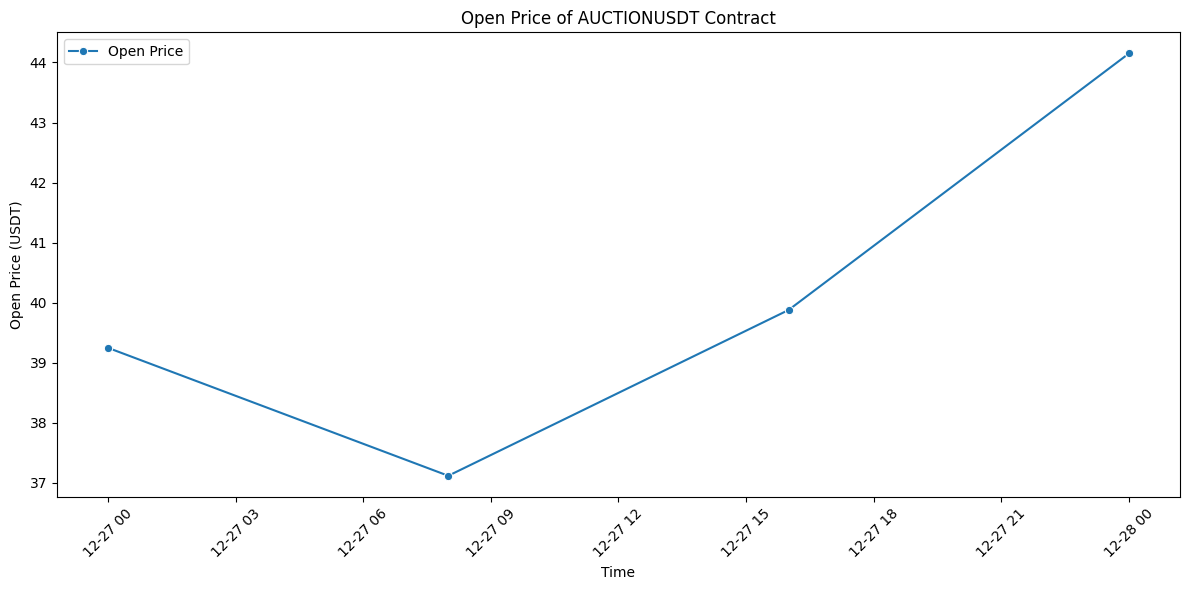

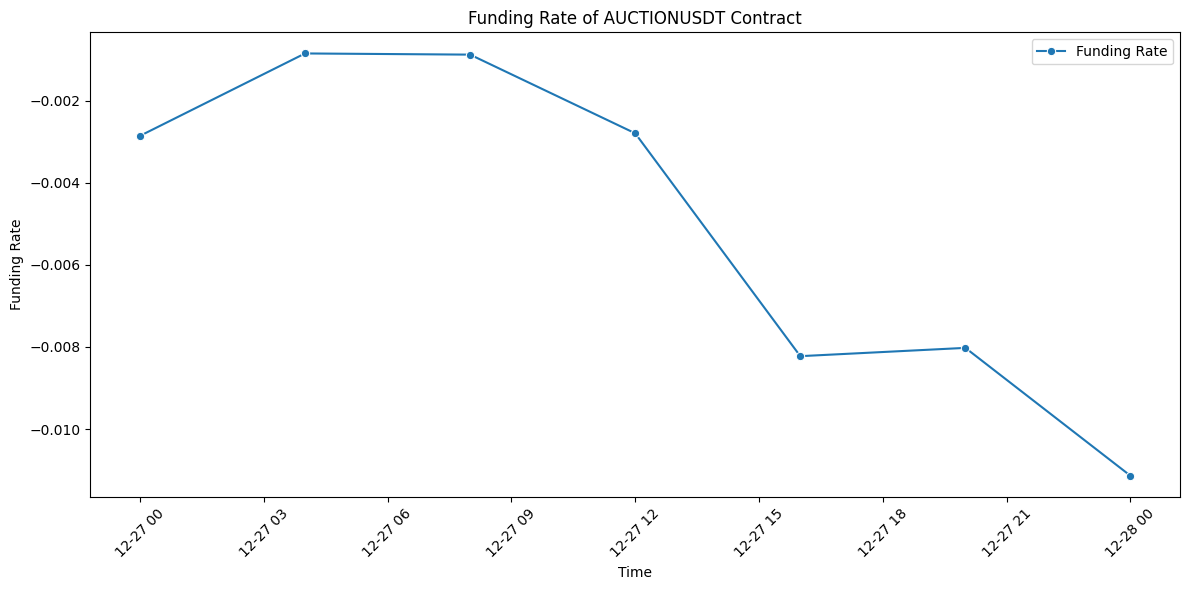

In [7]:
# Визуализация цены открытия контракта
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_df[start_time:end_time], x='timestamp', y='open', marker='o', label='Open Price')
plt.xlabel('Time')
plt.ylabel('Open Price (USDT)')
plt.title('Open Price of AUCTIONUSDT Contract')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Визуализация ставки финансирования
plt.figure(figsize=(12, 6))
sns.lineplot(data=fr_df, x=fr_df.index, y='fundingRate', marker='o', label='Funding Rate')
plt.xlabel('Time')
plt.ylabel('Funding Rate')
plt.title('Funding Rate of AUCTIONUSDT Contract')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Доход от финансирования и построение графика

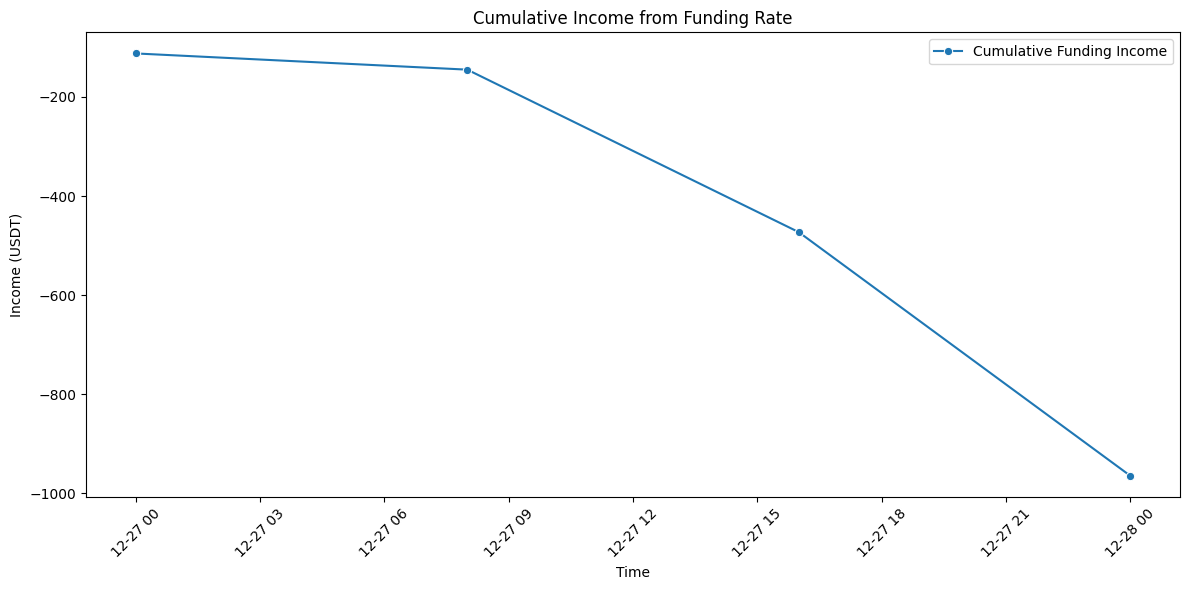

In [16]:
# Расчитаем доход от ставки финансирования
fr_df['income'] = fr_df['fundingRate'] * contract_quantity * fr_df['open']

# Посчитаем кумулятивный доход от ставки финансирования
fr_df['cumulative_income'] = fr_df['income'].cumsum()

# Визуализация кумулятивного дохода
plt.figure(figsize=(12, 6))
sns.lineplot(data=fr_df, x=fr_df.index, y='cumulative_income', marker='o', label='Cumulative Funding Income')
plt.xlabel('Time')
plt.ylabel('Income (USDT)')
plt.title('Cumulative Income from Funding Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()